### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptarán consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)



# Tarea 2: Filtrado de señales

## Introducción


Un **electrocardiograma (ECG)** es un gráfico de voltaje (amplitud) en función del tiempo correspondiente a la actividad eléctrica del corazón. Cada etapa del ciclo cardíaco es representado por una letra: **P, Q, R, S y T**. La siguiente figura muestra un esquema de un ECG con dos pulsos.

<img src="cardio.png" width="600">


El ECG se usa para hacer diagnósticos y en particular para analizar la existencia de anormalidades en el ciclo cardiaco. La **frecuencia cardiaca**, es decir el inverso del intervalo RR, de un humano normal en reposo está en el rango de **60 y 100 latidos por minuto**



## Enunciado

El hospital base de Valdivia tiene un electrocardiógrafo que mide la ECG en miliVolts [mV] a una frecuencia de muestreo de $360$ [Hz]

Durante el proceso de captura ciertos errores provocaron que la señal se contamine con 

- **(A)** Un ruido asociado al sistema eléctrico
- **(B)** Un ruido de baja frecuencia causado por un desperfecto del sensor
- **(C)** Un ruido blanco de origen térmico 

Esto complica el análisis del médico por lo que el hospital base los contrata a ustedes para **diseñar un filtro que limpie la señal ECG**

Resuelva las actividades que se piden a continuación, respondiendo y analizando donde corresponda

<IPython.core.display.Javascript object>


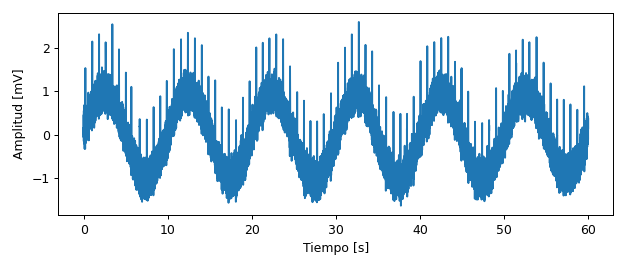

In [1]:
import numpy as np
import pickle
%matplotlib notebook
import matplotlib.pylab as plt

with open("ECG.pkl", "rb") as f:
    data = pickle.load(f)

Fs = 360
time = np.arange(len(data))/Fs
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time, data)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');

## Análisis (15%)

- Observe los primeros dos segundos de la señal, compare con el esquema mostrado en la introducción y discuta sobre los efectos causados por los ruidos **A**, **B** y **C** mencionados en el enunciado. Además responda  ¿Qué es un ruido blanco y que tipo de efecto introduce en la señal y en su espectro? ¿Qué es una tendencia y que tipo de efecto introduce en la señal y su espectro? 
- Calcule y muestre gráficamente el valor absoluto de la transformada de Fourier de la señal en función de la frecuencia y su espectrograma en función del tiempo y la frecuencia. Para el espectrograma decida el largo de ventana, traslape y tipo de ventana. Justifique su elección tomando en consideración el rango de frecuencias de un paciente normal y los *trade-off* aprendidos en clases
- En base a la señal, su espectro de magnitud y su espectrograma identifique la frecuencia central o el rango de frecuencias asociada a las tres fuentes de ruido. ¿En qué rango de frecuencias (Hz) se espera encontrar la señal de ritmo cardíaco de un humano normal en reposo?


<IPython.core.display.Javascript object>


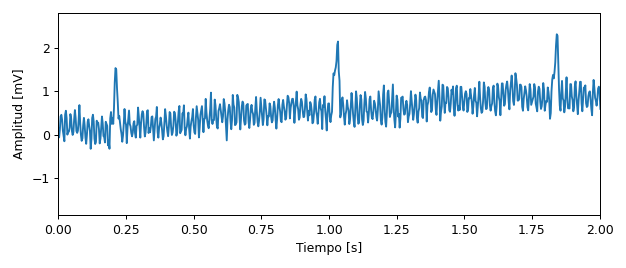

(0.0, 2.0)

In [2]:
Fs = 360
time = np.arange(len(data))/Fs
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time, data)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');
plt.xlim(0,2)

Podemos apreciar claramente la presecia de ruido en el ECG, al comparar la imagen con el grafico dentro de los 2 primeros segundos, podemos ver efectos como perdida de visión de los "puntos" P,Q,T,S y los puntos R en vez de ser un "pico" continuo tiene discontinuidad.

En función de los erroes, podemos apreciar a simple vista el ruido blanco de origen térmico (C), pero al ser este tan predominante, no podemos apreciar el ruido asociado al sistema electrico (A), debido a que este se confunde con el ruido blanco, por otro lado, además podemos ver que la señal tiene un caracter sinosoidal debido al defecto del sensor (B).

¿Que es un ruido blanco? Un ruido blanco es un ruido el cual está presente en todas las frecuencias de la señal y se observa claramente en la señal debido a que al comparar la señal con la imagen de referencia, podemos ver que existen perturbaciones a lo largo de toda la señal, afectando completamente a la señal y siendo imposible poder ver claramente los "puntos" importantes dentro del ECG.

¿Qué es una tendencia y que tipo de efecto introduce en la señal y su espectro? Una tendencia o patron en el comportamiento que tiene una señal debido a una perturbaciones externas.Estas tendencias al igual que el ruido blanco, dificultan la visualizacion de los "puntos" importantes del ECG, por lo que es importante eliminarlos para un claro análsis. En nuestro caso podemos ver una tendencia **sinosoidal**.

### Calcule y muestre gráficamente el valor absoluto de la transformada de Fourier de la señal en función de la frecuencia y su espectrograma en función del tiempo y la frecuencia. Para el espectrograma decida el largo de ventana, traslape y tipo de ventana. Justifique su elección tomando en consideración el rango de frecuencias de un paciente normal y los *trade-off* aprendidos en clases

**Calcule y muestre gráficamente el valor absoluto de la transformada de Fourier de la señal en función de la frecuencia**

<IPython.core.display.Javascript object>


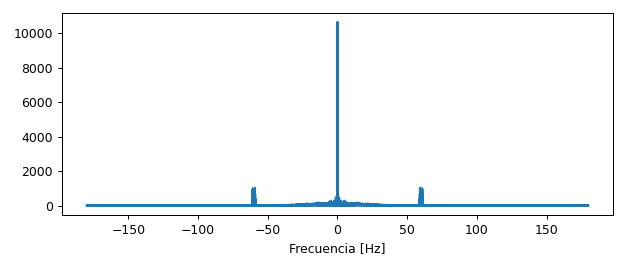

In [3]:
import scipy.fft as sfft
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)

freq = sfft.fftshift(sfft.fftfreq(n=len(data), d=1./Fs)); 
S = sfft.fftshift(sfft.fft(data)); 
SA = np.absolute(S)
SP = np.angle(S)

ax.plot(freq, SA); 
#ax.set_xlim([0, 1000]);
ax.set_xlabel('Frecuencia [Hz]');

<IPython.core.display.Javascript object>


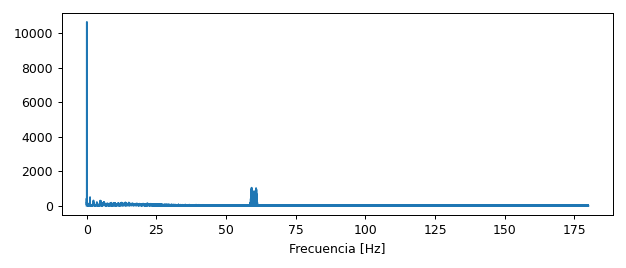

In [4]:
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)

freq = sfft.rfftfreq(n=len(data), d=1./Fs)
SA = np.absolute(sfft.rfft(data))

ax.plot(freq, SA); 
#ax.set_xlim([-1, 100]);
ax.set_xlabel('Frecuencia [Hz]');

**Espectrograma en función del tiempo y la frecuencia. Para el espectrograma decida el largo de ventana, traslape y tipo de ventana. Justifique su elección tomando en consideración el rango de frecuencias de un paciente normal y los *trade-off* aprendidos en clases**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html#scipy.signal.get_window


<IPython.core.display.Javascript object>


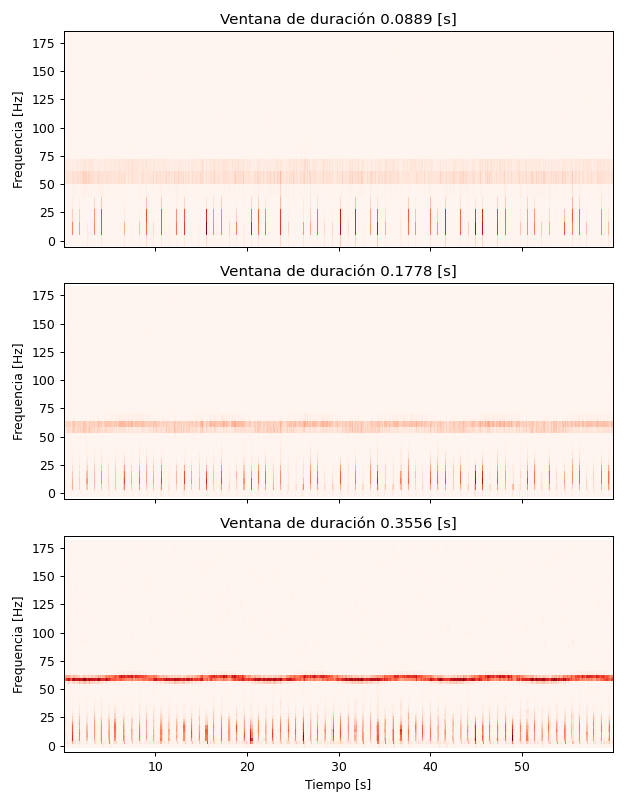

In [5]:
import scipy.signal
beta=6
fig, axs = plt.subplots(3, 1, figsize=(7, 9), tight_layout=True, sharex=True, sharey=True)
for ax, Nw in zip(axs, [32, 64, 128]):
    freqs, times, Sxx = scipy.signal.spectrogram(data,
                                                 fs=Fs,
                                                 nperseg=Nw, #largo de cada segmento
                                                 noverlap=Nw//1.5, #Npuntos que se sobreponen
                                                 window=('kaiser', beta))
    ax.pcolormesh(times, freqs, Sxx, cmap=plt.cm.Reds, shading='auto'); 
    ax.set_ylabel('Frequencia [Hz]');
    ax.set_title(f"Ventana de duración {Nw/Fs:0.4f} [s]")
#axs[-1].set_ylim([200, 700])    
axs[-1].set_xlabel('Tiempo [s]'); 

<IPython.core.display.Javascript object>


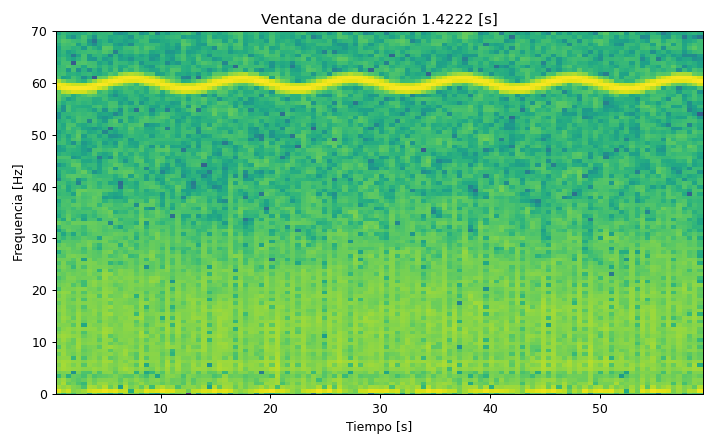

In [6]:
#Fs == 360

mask = time <= 60.0
t = time[mask]
s = data[mask]

Nw = 512
beta = 4
ventanas = [('kaiser', beta), ('hamming'), ('hann'), ('blackmanharris'),
           ('bartlett')]
wdw = ventanas[2]

fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)
freqs, times, Sxx = scipy.signal.spectrogram(s,   #'s' (2[s]) o 'data'(60[s])
                                             fs=Fs,
                                             nperseg=Nw,
                                             noverlap=Nw//1.5,
                                             window=wdw)
ax.pcolormesh(times, freqs, np.log10(Sxx + 1e-10), shading='auto')#, cmap=plt.cm.Reds)
ax.set_ylabel('Frequencia [Hz]');
ax.set_title(f"Ventana de duración {Nw/Fs:0.4f} [s]")
ax.set_xlabel('Tiempo [s]'); 
ax.set_ylim([0, 70])
plt.show()


- En base a la señal, su espectro de magnitud y su espectrograma identifique la frecuencia central o el rango de frecuencias asociada a las tres fuentes de ruido. ¿En qué rango de frecuencias (Hz) se espera encontrar la señal de ritmo cardíaco de un humano normal en reposo?

In [7]:
fmin = 60/60 #60 pulsaciones en 60 min
fmax = 100/60 #100 pulsaciones en 60 min
print(f"Rango de frecuencias cardiacas de un humano normal en reposo:"
     +f" [{fmin}, {fmax:.3f}] Hz")

Rango de frecuencias cardiacas de un humano normal en reposo: [1.0, 1.667] Hz


## Filtrado FIR (50%)

Describa lo que es un filtro FIR, explique paso a paso el método de enventanado y describa los argumentos y el valor de retorno de la función `scipy.signal.firwin`. 

Luego use este método para diseñar y aplicar tres filtros sobre la señal de entrada. El primero debe filtrar el ruido **(A)**, el segundo el ruido **(B)** y el tercero el ruido **(C)**. Indique la(s) frecuencia(s) de corte y el tipo de filtro en cada caso. Justifique su elección en base a sus observaciones en el paso anterior.

Considere una ventana de Hamming y $1001$ coeficientes para el filtro

Por cada filtro:
- Muestre la respuesta al impulso y la respuesta en frecuencia resultantes
- Filtre la señal convolucionando con la respuesta al impulso
- Calcule la resta entre la señal original y la señal filtrada. ¿Qué espera observar en este caso? Luego muestre gráficamente el espectro de magnitud y el espectrograma de la señal restada. En base a lo que observa y a los gráficos del punto anterior discuta sobre la efectividad del filtro

Finalmente
- Filtre la señal convolucionando con los tres filtros. Muestre el resultado graficamente. 
- Muestre un acercamiento de los primeros tres segundos de la señal filtrada, reconozca la fase R y márquela con una linea roja punteada.
- Cree una función que mida el tiempo RR en la señal filtrada. Grafique la frecuencia cardiaca en función del tiempo. ¿Se encuentra la persona en el rango sano o no?

### Describa lo que es un filtro FIR, explique paso a paso el método de enventanado y describa los argumentos y el valor de retorno de la función `scipy.signal.firwin`. 

**FIR Filtering**

FIR filters are simple and stable filters. Window method is the simplest FIR filter design method. Here all  frequencies  below  the  cut  off  frequency  are  passed  with  unity  amplitude  and  others  are  blocked.  The different windows used are Rectangular Window, Hanning window, Hamming window, and Blackman window.Using these windows High pass filter and Low pass filters are designed with cut off frequency 3Hz and 100Hz respectively. Then the noisy ECG signal is passed through these filters to remove noises

https://www.iosrjournals.org/iosr-jece/papers/ICETEM/Vol.%201%20Issue%201/ECE%2006-40-44.pdf

**Método de enventanado**

A partir de un requisito como "elimitar todas las frecuencias > x"
* Identificar las frecuencias de interés (o las frecuencias que deseamos eliminar) para  especificar una respuesta en frecuencia ideal
* obtener la respuesta al impulso ideal por medio de la transformada de fourier inversa
* truncar la respuesta al impulso ideal usando una ventana 

L :  cantidad de coeficientes que tiene nuestor filtro. A mayor L, mayor es la fidelidad con respecto a la respuesta en frecuencia ideal, asi como tambien es el costo computacional

`scipy.signal.firwin`

**Argumentos**

numtaps : L, numero de coeficientes que tendrá el filtro

cutoff: frecuencia(s) de corte a utilizar

width (opcional): Ancho de la region de transisicion (para usar con Kaiser)

window(opcional): ventana a utilizar, ya sea un string (nombre) o una tupla con nombre y parametros.

pass_zero(opcional): booleano (pasabajo si/no) o string [‘bandpass’, ‘lowpass’, ‘highpass’, ‘bandstop’] que indica el tipo de filtro a generar. relacionado con el argumento `cutoff` 

**Retorna**

h : respuesta al impulso ideal truncada (finita)


- **Considere una ventana de Hamming y 1001 coeficientes para el filtro**

In [8]:
from scipy import signal
window = 'hamming'
L = 1001

- **Muestre la respuesta al impulso y la respuesta en frecuencia resultantes**

- **Filtre la señal convolucionando con la respuesta al impulso**

- **Calcule la resta entre la señal original y la señal filtrada. ¿Qué espera observar en este caso? Luego muestre gráficamente el espectro de magnitud y el espectrograma de la señal restada. En base a lo que observa y a los gráficos del punto anterior discuta sobre la efectividad del filtro**

In [9]:
def plot_respuestas(h):
    global Fs
    fig, axs = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True)
    #L = h.shape[0]
    #t = np.arange(-L//2, L//2, step=1)/Fs
    freq, H = scipy.signal.freqz(h, fs=Fs)
    #axs[0].plot(t, h);
    axs[0].plot(h);
    axs[0].set_title("Respuesta al impulso")
    axs[0].set_xlabel('muestras');

    axs[1].plot(freq, np.absolute(H)); 
    axs[1].set_title("Respuesta en frecuencia")
    axs[1].set_xlabel('Frecuencia [Hz]');

In [20]:
def plot_sen_restada(resta, title):
    global window, Fs
    fig, axs = plt.subplots(2, 1, figsize=(7, 9), tight_layout=True)
    
    freqs = sfft.fftfreq(len(resta), 1/Fs)
    SA = np.absolute(sfft.fft(s))
    axs[0].plot(sfft.fftshift(freqs),
               sfft.fftshift(SA))
    axs[0].set_title(f"Espectro de amplitud {title}")
    
    Nw = 512 
    freqs, times, Sxx = scipy.signal.spectrogram(resta,
                                                 fs=Fs,
                                                 nperseg=Nw,
                                                 noverlap=Nw//1.5,
                                                 window=window)
    axs[1].pcolormesh(times, freqs, np.log10(Sxx + 1e-10), shading='auto')#, cmap=plt.cm.Reds)
    axs[1].set_ylabel('Frequencia [Hz]')
    axs[1].set_title(f"Ventana de duración {Nw/Fs:0.4f} [s]\n{title}")
    axs[1].set_xlabel('Tiempo [s]')
    axs[1].set_ylim([0, 70])

* (A) Un ruido asociado al sistema eléctrico

Determinamos que la frecuencia del ruido asociado al sistema eléctrico está centrada en 60 [Hz] y oscila en torno a este valor a causa de la tendencia ocasionada por el ruido de baja frecuencia. Para actuar sobre este ruido solamente, procederemos a crear un filtro rechaza banda que bloquee el paso de las frecuencias asociadas. En este caso las frecuencias de corte $f_{c1} < f_{c2}$ serán:

$f_{c1}$ = 57 
$f_{c2}$ = 63 

<IPython.core.display.Javascript object>


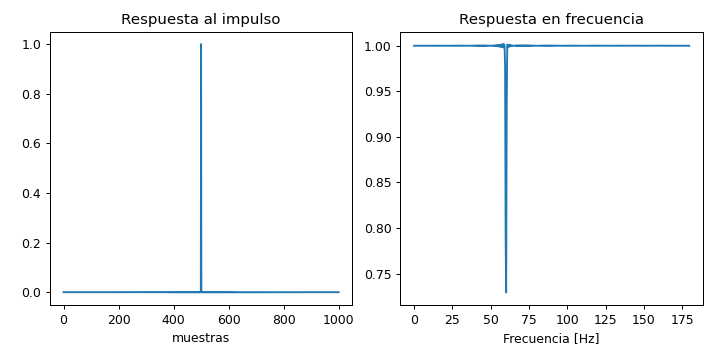

In [26]:
h_A = signal.firwin(L, [59.9, 60.1], window=window,
                    pass_zero='bandstop', fs=Fs)
plot_respuestas(h_A)

* **Filtre la señal convolucionando con la respuesta al impulso**

<ipython-input-27-97f05642eee0>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(7,3), tight_layout=True)


<IPython.core.display.Javascript object>


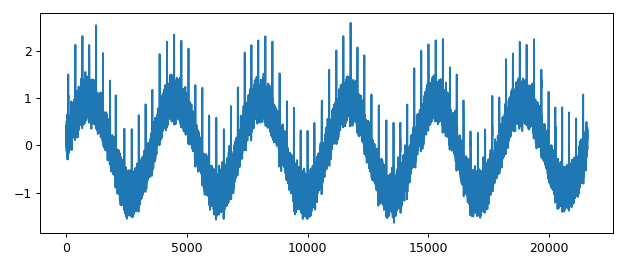

In [27]:
y_A = scipy.signal.convolve(data, h_A, mode='same')
#Y_A = sfft.rfftfreq(n=)
fig, ax = plt.subplots(figsize=(7,3), tight_layout=True)
ax.plot(y_A)

Calcule la resta entre la señal original y la señal filtrada.

- ¿Qué espera observar en este caso? 

    ...

<IPython.core.display.Javascript object>


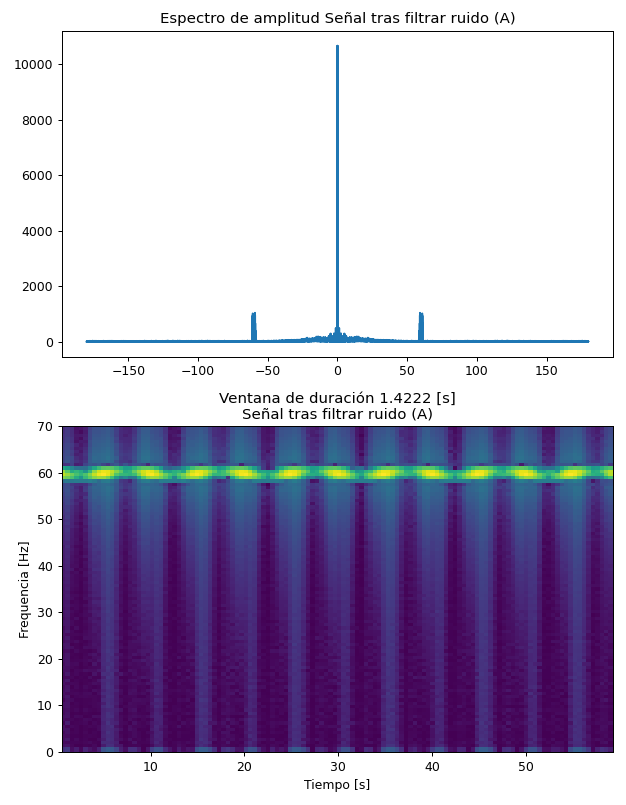

In [28]:
r_A = data - y_A
plot_sen_restada(r_A, "Señal tras filtrar ruido (A)")

* (B) Un ruido de baja frecuencia causado por un desperfecto del sensor

Para eliminar este ruido en particular utilizamos la gráfica de la señal sin limpiar para calcular el periodo (es posible hacerlo de forma analitca?) de la tendencia que esta provoca. Determinamos que el periodo es de aproximadamente 10[s] por lo que la frecuencia asociada tendrá un valor cercano a 0.1[Hz]. 

hacer highpass con frecuencia de corte 0.1 o bandstop no mas?


<IPython.core.display.Javascript object>


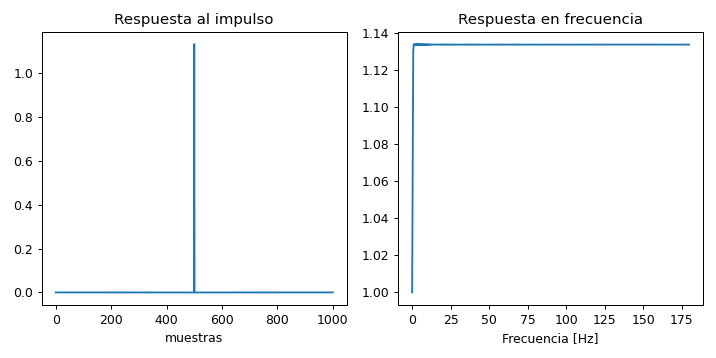

In [14]:
h_B = signal.firwin(L, [0.083, 0.125], window=window,
                    pass_zero='bandstop', fs=Fs)
plot_respuestas(h_B)

* **Filtre la señal convolucionando con la respuesta al impulso**

<IPython.core.display.Javascript object>


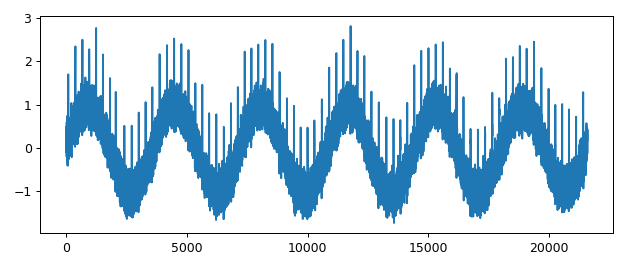

In [15]:
y_B = scipy.signal.convolve(data, h_B, mode='same')
#Y_A = sfft.rfftfreq(n=)
fig, ax = plt.subplots(figsize=(7,3), tight_layout=True)
ax.plot(y_B)

Calcule la resta entre la señal original y la señal filtrada.

- ¿Qué espera observar en este caso? 

    ...

<IPython.core.display.Javascript object>


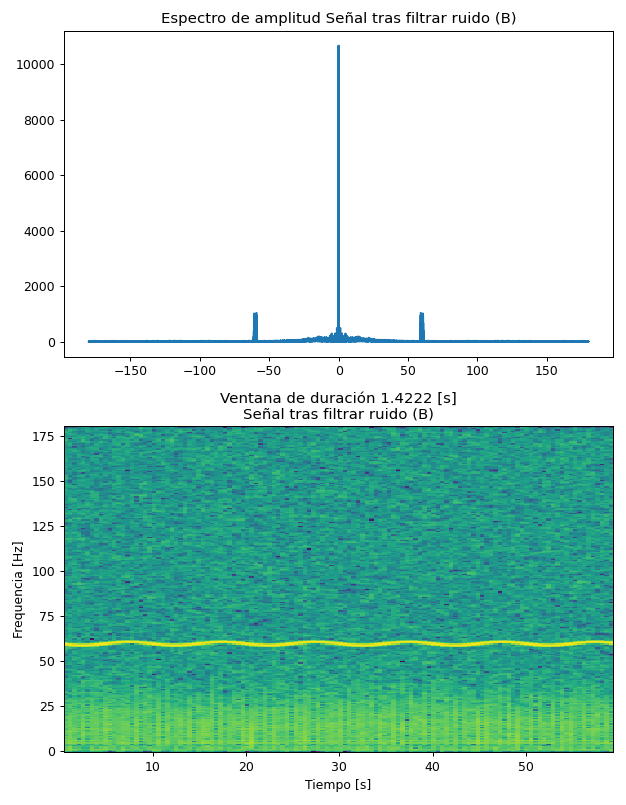

In [16]:
r_B = data - y_B
plot_sen_restada(r_B, "Señal tras filtrar ruido (B)")

* (C) Un ruido blanco de origen térmico

Para el caso del ruido blanco, el cual no se encuentra en una frecuencia en particular, hace falta adoptar un enfoque distinto al de los otros dos ruidos. Para quitarlo haremos un `bandpass` con el rango de frecuencias cardíacas de un humano sano en reposo.

<IPython.core.display.Javascript object>


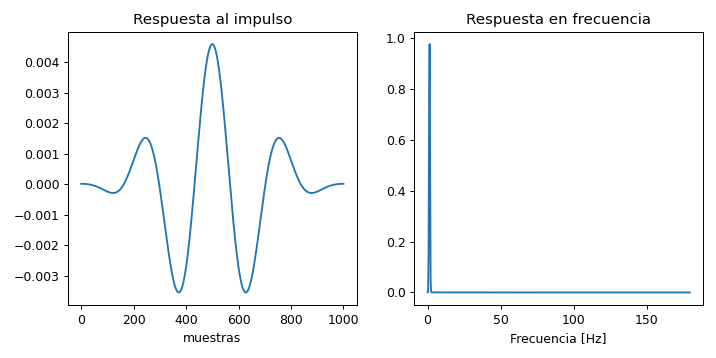

In [17]:
h_C = signal.firwin(L, [fmin, fmax], window=window,
                    pass_zero='bandpass', fs=Fs)
plot_respuestas(h_C)

* **Filtre la señal convolucionando con la respuesta al impulso**

<IPython.core.display.Javascript object>


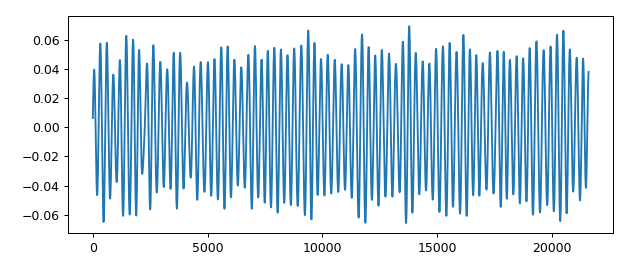

In [18]:
y_C = scipy.signal.convolve(data, h_C, mode='same')
#Y_A = sfft.rfftfreq(n=)
fig, ax = plt.subplots(figsize=(7,3), tight_layout=True)
ax.plot(y_C)

Calcule la resta entre la señal original y la señal filtrada.

- ¿Qué espera observar en este caso? 

    ...

<IPython.core.display.Javascript object>


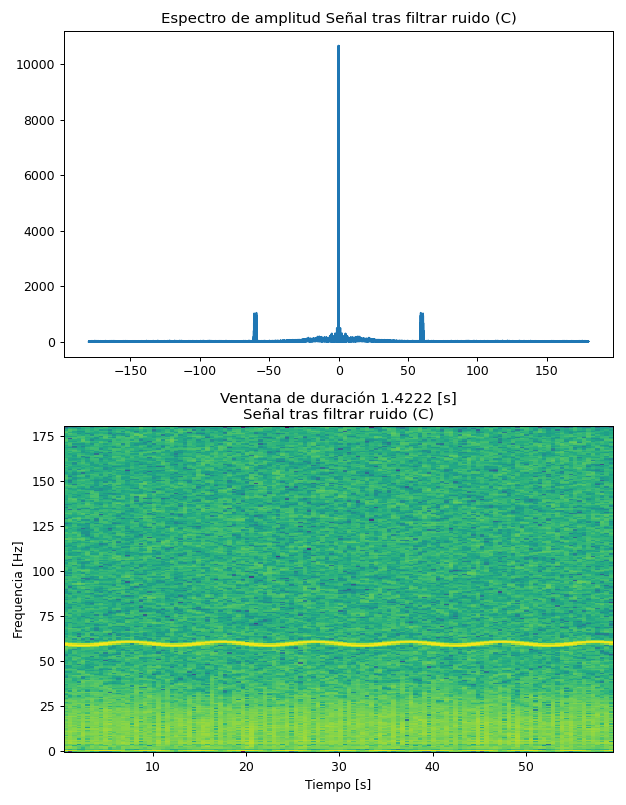

In [19]:
r_C = data - y_C
plot_sen_restada(r_C, "Señal tras filtrar ruido (C)")

## Filtrado IIR (35%)

Describa los filtros IIR y compárelo con los filtros FIR. Describa los argumentos y el valor de retorno de la función `scipy.signal.iirfilter`.

Luego use este método para diseñar tres filtros. Los filtros deben cumplir el mismo propósito que en el caso anterior. Considere filtros IIR de tipo `butterworth` y todos del mismo orden. Aplique los filtros sobre la señal de entrada usando la función `scipy.signal.lfilter`.

El objetivo es encontrar el mínimo orden para los filtros IIR tal que el error medio cuadrático entre la señal filtrada IIR y la señal filtrada FIR sea menor que un 1% de la varianza de la señal filtrada FIR. Es decir que si $x$ es la señal filtrada IIR e $y$ es la señal filtrada FIR donde $N = \min(\text{len}(x), \text{len}(y))$ se cumpla que

$$
\sum_{i=1}^N (x_i - y_i)^2 < 0.01 \sum_{i=1}^N (y_i - \bar y_i)^2
$$

Finalmente, discuta sobre sus hallazgos muestre gráficamente el resultado del mejor filtro IIR
